In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def read_file(url):
    '''this function is to read file from local path.'''
    with open(url) as f:
        df = pd.read_csv(url,decimal=';')
        df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')', '')
        df.sort_values('movieid', ascending=True, axis=0,inplace=True)
        df.set_index('movieid',drop=False,inplace=True)
    return df

In [8]:
ratings = read_file('../data/ratings.csv')

In [9]:
movies_genres = read_file('../data/movies_genres.csv')

In [10]:
ratings.head(5)

,userid,movieid,rating,timestamp
movieid,,,,
1,1,1,4.0,964982703
1,517,1,4.0,1487954343
1,213,1,3.5,1316196157
1,514,1,4.0,1533872400
1,214,1,3.0,853937855


In [11]:
ratings['movie_title'] = None
def get_movie_title(movieid):
    for m_id in movieid:
        ratings.loc[m_id,'movie_title'] = movies_genres.loc[m_id,'title']
    return ratings['movie_title']

In [12]:
movieid=ratings.index.unique()
get_movie_title(movieid)

movieid
1                                  Toy Story
1                                  Toy Story
1                                  Toy Story
1                                  Toy Story
1                                  Toy Story
                         ...                
193581    Black Butler: Book of the Atlantic
193583                 No Game No Life: Zero
193585                                 Flint
193587          Bungo Stray Dogs: Dead Apple
193609          Andrew Dice Clay: Dice Rules
Name: movie_title, Length: 100836, dtype: object

In [13]:
ratings.dropna(subset=['movie_title'],inplace=True)

In [14]:
ratings.to_csv('rating_movie_title.csv',index=False)

In [40]:
user_rating_metrix = ratings.drop_duplicates(subset=['movie_title','userid'], keep='last').pivot('userid','movie_title','rating')

In [41]:
#user_rating_metrix.to_csv('user_rating_metrix.csv')

In [ ]:
# impute, try not bias, less manipulation

In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=  2)

In [44]:
Rtrue = imputer.fit_transform(user_rating_metrix)

In [23]:
Rtrue.shape

(610, 9433)

In [154]:
def imputer0(imputer,data):
    R_true = np.empty([len(user_rating_metrix.index), len(user_rating_metrix.columns)])
    R_true = imputer.fit_transform(data)
    return R_true
imputer = KNNImputer(n_neighbors=2)
data = user_rating_metrix
R_true=imputer0(imputer,data)

In [156]:
R_true.shape

(610, 9433)

In [58]:
from sklearn.decomposition import NMF

model = NMF(n_components=2)  

In [68]:
def get_R_predict(model_,Rtrue):
    model.fit(Rtrue)
    p = model.components_
    q = model.transform(Rtrue)
    #Q_df = pd.DataFrame(model.components_, columns=user_rating_metrix.columns, index=['feature1', 'feature2'])
    #P_df = pd.DataFrame(model.transform(Rtrue), columns=['feature1', 'feature2'], index= user_rating_metrix.index)
    R = pd.DataFrame(np.dot(P, Q).round(), index=user_rating_metrix.index, columns=user_rating_metrix.columns)
    return R    

In [70]:
model_ = NMF(n_components=2)
get_R_predict(model_,Rtrue)

/Users/lilycheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


movie_title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userid,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,4.0,5.0,4.0,2.0,4.0,3.0,4.0,4.0,...,4.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,1.0
2,4.0,4.0,4.0,5.0,4.0,2.0,4.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0
3,4.0,4.0,3.0,5.0,4.0,1.0,3.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0
4,4.0,4.0,3.0,5.0,4.0,1.0,3.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0
5,4.0,4.0,4.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,4.0,4.0,4.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0
607,4.0,4.0,4.0,5.0,4.0,2.0,4.0,3.0,4.0,3.0,...,4.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0
608,4.0,4.0,3.0,5.0,4.0,1.0,3.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0


In [59]:
model.fit(Rtrue)

/Users/lilycheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=2)

- Get matrices Q and P

In [60]:
Q = model.components_

In [61]:
Q_df = pd.DataFrame(model.components_, columns=user_rating_metrix.columns, index=['feature1', 'feature2'])
Q_df

movie_title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
feature1,1.106661,1.106661,0.968328,1.383326,1.105957,0.414998,0.815729,0.829995,0.967444,0.820065,...,0.690167,1.032679,1.038688,0.829995,0.829995,1.066347,0.781526,0.557678,0.829164,0.276665
feature2,0.251234,0.251234,0.219830,0.314042,0.253694,0.094213,0.822521,0.188425,0.594368,0.646604,...,1.085377,0.405480,0.076111,0.188425,0.188425,0.170809,0.210727,0.241989,0.528005,0.062808


<AxesSubplot:xlabel='movie_title'>

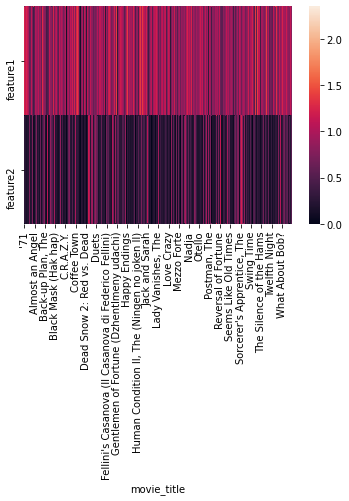

In [28]:
sns.heatmap(Q_df)

In [62]:
P = model.transform(Rtrue)
P.shape

(610, 2)

In [63]:
P_df = pd.DataFrame(P, columns=['feature1', 'feature2'], index= user_rating_metrix.index)
P_df

,feature1,feature2
userid,,
1,3.259075,1.574434
2,3.408803,0.966938
3,3.480534,0.501537
4,3.493372,0.519058
5,3.488051,0.598738
...,...,...
606,3.459868,0.795789
607,3.355437,1.141842
608,3.432402,0.753136


In [33]:
model.reconstruction_err_

871.3926881434488

In [64]:
R = pd.DataFrame(np.dot(P, Q).round(), index=user_rating_metrix.index, columns=user_rating_metrix.columns)

In [65]:
R.loc[R.index == 1]

movie_title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userid,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,4.0,5.0,4.0,2.0,4.0,3.0,4.0,4.0,...,4.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,1.0


In [66]:
R.shape, user_rating_metrix.shape, Rtrue.shape

((610, 9433), (610, 9433), (610, 9433))

In [148]:
pd.DataFrame(user_rating_metrix.loc[517]).T

movie_title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- get new ratings and recommend movies to user 517

In [179]:
user = user_rating_metrix.loc[user_rating_metrix.index==517]

In [181]:
user

movie_title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userid,,,,,,,,,,,,,,,,,,,,,
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
user_r = np.dot(user_p,Q)

In [75]:
df_user_r = pd.DataFrame(user_r,index=[517],columns=user_rating_metrix.columns)

In [82]:
df_user_r

movie_title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
517,3.949708,3.949708,3.455995,4.937135,3.947246,1.481141,2.923194,2.962281,3.459796,2.935386,...,2.480467,3.688839,3.704149,2.962281,2.962281,3.804504,2.78991,1.992514,2.965621,0.987427


In [76]:
# test on two ways of get R_rate for user 517. They are the same, no need to run model again. 
np.sum(np.sqrt(R.loc[R.index==517].iloc[0,:]-round(df_user_r.T[517])))

0.0

In [77]:
sorted(np.array(df_user_r.iloc[0,:]))[-5:]

[4.937135054129128,
 4.937135054129128,
 4.937135054129128,
 4.937135054129128,
 4.937135054129128]

In [90]:
np.random.choice(df_user_r.T.loc[df_user_r.T[517]==4.937135054129128].index,4)

array(['Madame Sousatzka', 'Junior and Karlson', 'Happy Feet Two',
       'Unicorn City'], dtype=object)

In [96]:
recomendataion = np.random.choice(df_user_r.T.loc[df_user_r.T[517]==4.937135054129128].index,4)
recomendataion

array(['Scooby-Doo! Abracadabra-Doo', 'A Detective Story',
       'A Flintstones Christmas Carol', "Last Year's Snow Was Falling"],
      dtype=object)

- Draft version of a recommender, base model NMF

In [97]:
userid=int(input('Please type in your ID'))

Please type in your ID 89


In [98]:
sorted(R.loc[R.index==userid].iloc[0,:])[-5:]

[5.0, 5.0, 5.0, 5.0, 5.0]

In [99]:
chose_score = np.random.choice(sorted(R.loc[R.index==1].iloc[0,:])[-5:])

In [100]:
user_data = user_rating_metrix.loc[user_rating_metrix.index==userid,:].T

In [105]:
recommendation_pool = user_data[user_data[userid].isnull()].index.values

- recomend 1 movie

In [113]:
recomendataion  = np.random.choice(R.T.loc[R.T[1]==chose_score].index,1)[0]
recomendataion

'Ryuzo and the Seven Henchmen'

- recomend 5 movies

In [117]:
recomendataion = []
while len(recomendataion)<5:
    movie = np.random.choice(R.T.loc[R.T[1]==chose_score].index,1)[0]
    if movie in recomendation_pool:
        recomendataion.append(movie)
    else:
        movie = np.random.choice(R.T.loc[R.T[1]==chose_score].index,1)[0]

In [118]:
recomendataion

['Into the Abyss',
 'Louis C.K.: Live at The Comedy Store',
 'FLCL',
 'Return to Treasure Island',
 'Seve']

In [123]:
def recommender(chose_score,recomendation_pool):
    recomendataion = []
    while len(recomendataion)<5:
        movie = np.random.choice(R.T.loc[R.T[1]==chose_score].index,1)[0]
        if movie in recomendation_pool:
            recomendataion.append(movie)
        else:
            movie = np.random.choice(R.T.loc[R.T[1]==chose_score].index,1)[0]
    return recomendataion

In [124]:
recommender(chose_score,recomendation_pool)

['Desert Hearts',
 'Lost in Translation',
 'Laggies',
 'Center Stage',
 'Free to Play']